In [65]:
import os
import numpy as np
from matplotlib import pyplot

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
data = np.loadtxt('/content/drive/MyDrive/SIS 420 Inteligencia Artificial/Datasets/Video_Games_preparado.txt', delimiter=',')
X1, X2, X3, X4, X5, X6, y = data[:, 0], data[:,1], data[:, 2], data[:,3], data[:, 4], data[:,6], data[:, 5]
m = y.size

In [68]:
print(X1)
print(X2)
print(X3)
print(X4)
print(X5)
print(X6)
print(m)

[ 1.  2.  1. ... 23.  9. 23.]
[2006. 1985. 2008. ... 2016. 2003. 2016.]
[8.253e+01 4.024e+01 3.552e+01 ... 1.000e-02 1.000e-02 1.000e-02]
[76. 26. 82. ... 71. 26. 84.]
[51. 42. 73. ... 24. 97. 35.]
[ 322. 7042.  709. ... 5042. 2108. 3140.]
16719


In [69]:
def plotData(X, y):

    fig = pyplot.figure()

    pyplot.plot(X, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Puntuacion de usuarios/ jugadores')
    pyplot.xlabel('Ventas globales')

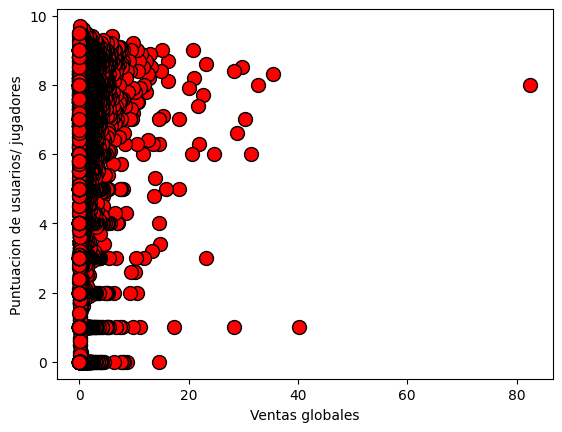

In [56]:
plotData(X3, y)

In [74]:
X3 = np.stack([np.ones(m), X3], axis=1)

In [76]:
print(X3)

[[1.000e+00 8.253e+01]
 [1.000e+00 4.024e+01]
 [1.000e+00 3.552e+01]
 ...
 [1.000e+00 1.000e-02]
 [1.000e+00 1.000e-02]
 [1.000e+00 1.000e-02]]


In [77]:
def computeCost(X3, y, theta):

    m = y.size

    J = 0
    h = np.dot(X3, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X3, theta) - y))
    return J

In [78]:
J = computeCost(X3, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
print('Valor de puntuacion esperado (aproximadamente) 19.89')

J = computeCost(X3, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)
print('Valor de puntuacion esperado (aproximadamente)  7769.70')

Con theta = [0, 0] 
 Costo calculado = 19.89
Valor de puntuacion esperado (aproximadamente) 19.89
Con theta = [-1, 2]
 Costo calculado = 23.62
Valor de puntuacion esperado (aproximadamente)  7769.70


In [79]:
def gradientDescent(X3, y, theta, alpha, num_iters):

    m = y.shape[0]

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X3, theta) - y).dot(X3)

        J_history.append(computeCost(X3, y, theta))

    return theta, J_history

In [80]:
theta = np.zeros(2)

iterations = 15000
alpha = 0.003

theta, J_history = gradientDescent(X3 ,y, theta, alpha, iterations)
print(J_history[-1])
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

3.6055544508179858
Theta encontrada por descenso gradiente: 5.6261, 0.1420
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


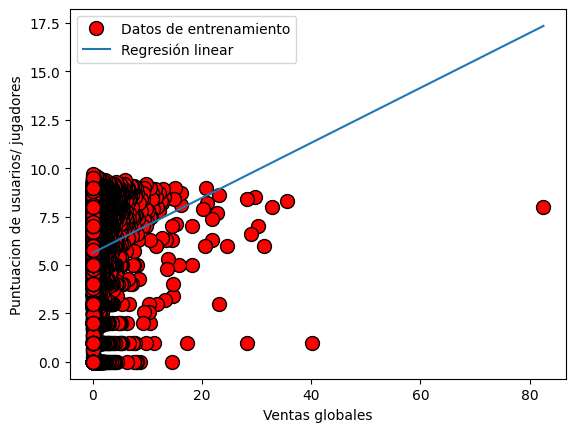

In [82]:
plotData(X3[:, 1], y)
pyplot.plot(X3[:, 1], np.dot(X3, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

In [86]:
predict1 = np.dot([1, 3.5], theta)
print('Para una población = 35,000, se predice un beneficio de {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 9], theta)
print('Para una población de = 90,000, se predice un beneficio de {:.2f}\n'.format(predict2*10000))

predict3 = np.dot([1, 4.5], theta)
print('Para una población = 45,000, se predice un beneficio de {:.2f}\n'.format(predict3*10000))

predict4 = np.dot([1, 12], theta)
print('Para una población de = 120,000, se predice un beneficio de {:.2f}\n'.format(predict4*10000))

predict5 = np.dot([1, 1.5], theta)
print('Para una población = 15,000, se predice un beneficio de {:.2f}\n'.format(predict5*10000))

predict6 = np.dot([1, 7], theta)
print('Para una población de = 70,000, se predice un beneficio de {:.2f}\n'.format(predict6*10000))

predict7 = np.dot([1, 8], theta)
print('Para una población = 8,000, se predice un beneficio de {:.2f}\n'.format(predict7*10000))

predict8 = np.dot([1, 11], theta)
print('Para una población de = 110,000, se predice un beneficio de {:.2f}\n'.format(predict8*10000))

predict9 = np.dot([1, 3], theta)
print('Para una población = 30,000, se predice un beneficio de {:.2f}\n'.format(predict9*10000))

predict10 = np.dot([1, 5], theta)
print('Para una población de = 50,000, se predice un beneficio de {:.2f}\n'.format(predict10*10000))



Para una población = 35,000, se predice un beneficio de 61230.07

Para una población de = 90,000, se predice un beneficio de 69038.73

Para una población = 45,000, se predice un beneficio de 62649.83

Para una población de = 120,000, se predice un beneficio de 73298.00

Para una población = 15,000, se predice un beneficio de 58390.56

Para una población de = 70,000, se predice un beneficio de 66199.22

Para una población = 8,000, se predice un beneficio de 67618.97

Para una población de = 110,000, se predice un beneficio de 71878.24

Para una población = 30,000, se predice un beneficio de 60520.19

Para una población de = 50,000, se predice un beneficio de 63359.70



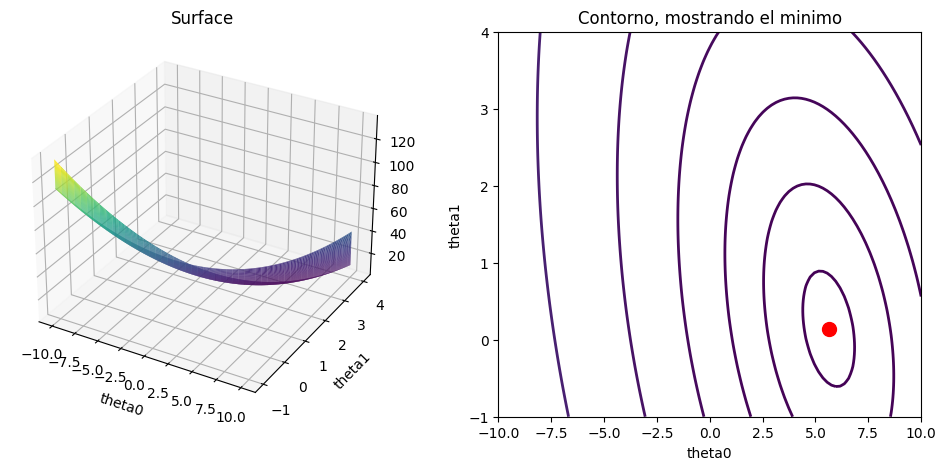

In [84]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X3, y, [theta0, theta1])

J_vals = J_vals.T

fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')
pass